# Código Cargar texto:

Librerías necesarias, tanto para la extracción de texto del PDF como para el análisis posterior (mBART, generación de documentos Word, etc.).
Extracción de texto de un archivo PDF, permitiendo seleccionar un intervalo de páginas.
Obtener y mostrar el número de palabras extraídas y visualizar las palabras más frecuentes en una nube de palabras.

# Paso 1: Convertir PDF a Word

# Celda 1: Convertir PDF a DOCX
from pdf2docx import Converter  # Para convertir PDF a DOCX
import os  # Para manejar rutas de archivos

# Ruta del archivo PDF
pdf_path = r"E:\NEURONAL\CAS\CAS.pdf"  # Cambia esta ruta según sea necesario

# Definir la ruta del archivo Word en la misma carpeta que el PDF y con el mismo nombre
pdf_dir = os.path.dirname(pdf_path)  # Obtener el directorio del archivo PDF
word_path = os.path.join(pdf_dir, os.path.splitext(os.path.basename(pdf_path))[0] + ".docx")

# Convertir PDF a Word
cv = Converter(pdf_path)
cv.convert(word_path, start=0, end=None)
cv.close()

print(f"Archivo DOCX creado en: {word_path}")


# Método 1 Extraer texto del documento Word, visualizar, mBART y Resumen

Palabras de inicio y fin encontradas.
Número de palabras extraídas: 5869

Primeras 200 palabras del texto extraído:

Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de Melquiades, hizo una truculenta demostración pública de lo que él m

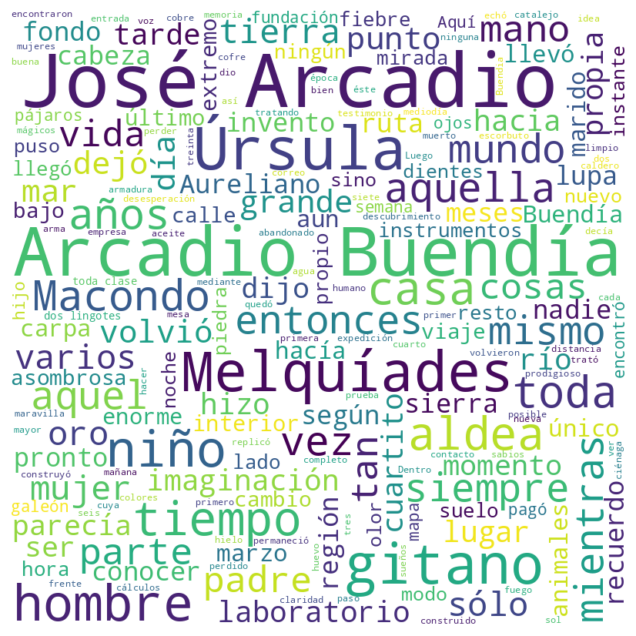

Modelo de resumen cargado.

Resumiendo bloque 1 con 500 palabras:

Resumiendo bloque 2 con 500 palabras:

Resumiendo bloque 3 con 500 palabras:

Resumiendo bloque 4 con 500 palabras:

Resumiendo bloque 5 con 500 palabras:

Resumiendo bloque 6 con 500 palabras:

Resumiendo bloque 7 con 500 palabras:

Resumiendo bloque 8 con 500 palabras:

Resumiendo bloque 9 con 500 palabras:

Resumiendo bloque 10 con 500 palabras:

Resumiendo bloque 11 con 500 palabras:

Resumiendo bloque 12 con 369 palabras:

Resumen del texto extraído:

vez de casa en casa. En marzo los gitanos volvieron los gitanos. Esta vez de la cata. de la cata. de un cata. de un cata. de un cata de la guerra. de un catastro. del gobierno. José Arcadio Buendía no trató siquiera de consolarla consolarla consolarla consolarla consolarla, consolarla, consolarla, consolarla, consolarla, consolarla, consolarse, consolarse, entregado consolarse, entregado, entregado, entregado por entero a sus experimentos, entregado por entero a lamen

In [1]:
from transformers import pipeline  # Para el modelo de resumen mBART
import docx  # Para manipular archivos DOCX
from wordcloud import WordCloud  # Para la visualización de la nube de palabras
import matplotlib.pyplot as plt  # Para gráficos
import nltk
import re  # Para expresiones regulares

# Descargar stopwords en español si no están ya descargadas
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))

# Función para limpiar texto de cabeceras, números de página y dobles espacios
def limpiar_texto(text):
    text = text.replace("Cien años de soledad Gabriel García Márquez", "")
    text = re.sub(r'\d+', '', text)  # Quita números de página
    text = re.sub(r'\s+', ' ', text)  # Quita dobles espacios
    return text.strip()  # Quita espacios al principio y al final

# Función para cargar texto desde un archivo Word
def cargar_texto_word(file_path):
    doc = docx.Document(file_path)
    texto_completo = []
    for para in doc.paragraphs:
        texto_completo.append(para.text)
    return '\n'.join(texto_completo)

# Función para extraer texto entre palabras específicas
def extraer_texto_entre_palabras(texto_completo, start_word, end_word):
    texto_completo = limpiar_texto(texto_completo)
    if start_word in texto_completo and end_word in texto_completo:
        start_index = texto_completo.find(start_word)
        end_index = texto_completo.find(end_word, start_index)
        if end_index != -1:
            texto_extraido = texto_completo[start_index:end_index + len(end_word)]
            print("Palabras de inicio y fin encontradas.")
        else:
            print(f"Advertencia: '{end_word}' no se encontró después de '{start_word}'.")
            texto_extraido = ""
    else:
        print(f"Advertencia: No se encontraron '{start_word}' o '{end_word}' en el texto.")
        texto_extraido = ""
    return texto_extraido

# Ruta del archivo Word
word_path = r"E:\NEURONAL\CAS\CAS.docx"

# Cargar y extraer texto
texto_completo = cargar_texto_word(word_path)
texto_extraido = extraer_texto_entre_palabras(texto_completo, "Muchos", "tiempo.")

# Mostrar el número de palabras extraídas
num_palabras = len(texto_extraido.split())
print(f"Número de palabras extraídas: {num_palabras}")

# Mostrar las primeras 200 palabras del texto extraído
if texto_extraido:
    print("\nPrimeras 200 palabras del texto extraído:\n")
    print(" ".join(texto_extraido.split()[:200]))

# Visualizar la nube de palabras
if texto_extraido:
    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=10, stopwords=stopwords).generate(texto_extraido)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No hay texto extraído para generar la nube de palabras.")

# Configuración del modelo de resumen
try:
    summarizer = pipeline("summarization", model="facebook/mbart-large-cc25")
    print("Modelo de resumen cargado.")
except Exception as e:
    print(f"Error al cargar el modelo de resumen: {e}")

# Función para dividir el texto en bloques de 500 palabras
def dividir_texto(texto, palabras_por_bloque=500):
    palabras = texto.split()
    bloques = [" ".join(palabras[i:i + palabras_por_bloque]) for i in range(0, len(palabras), palabras_por_bloque)]
    return bloques

# Función para resumir cada bloque de texto
def resumir_bloques(texto):
    bloques = dividir_texto(texto)
    resúmenes = []
    for i, bloque in enumerate(bloques):
        print(f"\nResumiendo bloque {i + 1} con {len(bloque.split())} palabras:")
        try:
            resumen = summarizer(bloque, max_length=150, min_length=50, do_sample=False, clean_up_tokenization_spaces=True)
            resúmenes.append(resumen[0]['summary_text'])
        except Exception as e:
            print(f"Error al resumir el bloque {i + 1}: {e}")
    resumen_final = " ".join(resúmenes)
    return resumen_final

# Generar resumen si hay texto extraído
if texto_extraido:
    resumen_texto = resumir_bloques(texto_extraido)
    print("\nResumen del texto extraído:\n")
    print(resumen_texto)

    # Número de palabras en el resumen
    num_palabras_resumen = len(resumen_texto.split())
    print(f"\nNúmero de palabras en el resumen: {num_palabras_resumen}")
else:
    print("No hay texto extraído para resumir.")


# Como el resultado no es bueno vamos aproceder a su limpieza

In [3]:
import re

# Resumen de 860 palabras generado en la celda anterior
# Asegúrate de que `resumen_texto` está definido en la celda anterior
# y contiene el texto generado anteriormente

def limpiar_resumen_avanzado(resumen):
    """
    Función avanzada para limpiar el resumen, eliminando duplicaciones de frases,
    mejorando la coherencia y eliminando redundancias excesivas.
    """
    # 1. Eliminar duplicaciones de palabras consecutivas
    resumen = re.sub(r'\b(\w+)( \1\b)+', r'\1', resumen)
    
    # 2. Eliminar duplicaciones de frases (dos o más palabras repetidas consecutivamente)
    resumen = re.sub(r'\b(\w+ \w+)( \1\b)+', r'\1', resumen)
    
    # 3. Eliminar texto duplicado causado por el procesamiento original
    # Usa expresiones regulares más amplias para detectar duplicados largos
    resumen = re.sub(r'(\b\w+\b.{0,15})\1+', r'\1', resumen)
    
    # 4. Ajuste de espacios en blanco y eliminación de dobles espacios o espacios innecesarios
    resumen = re.sub(r'\s+', ' ', resumen).strip()

    # 5. Limpiar algunos caracteres no deseados y verificar coherencia básica
    resumen = resumen.replace(".,", ".").replace(",,", ",").replace(".,.", ".")
    
    return resumen

# Aplicar la función de limpieza avanzada sobre el resumen de 860 palabras
resumen_limpio = limpiar_resumen_avanzado(resumen_texto)

# Imprimir el resumen limpio
print("\nResumen después de la limpieza avanzada:\n")
print(resumen_limpio)

# Mostrar el número de palabras después de la limpieza
num_palabras_limpio = len(resumen_limpio.split())
print(f"\nNúmero de palabras en el resumen limpio: {num_palabras_limpio}")



Resumen después de la limpieza avanzada:

vez de casa en casa. En marzo los gitanos volvieron los gitanos. Esta vez de la cata. de un cata. de un cata de la guerra. de un catastro. del gobierno. José Arcadio Buendía no trató siquiera de consolarla, consolarla, consolarse, entregado consolarse, entregado, entregado por entero a sus experimentos, entregado por entero a lamentó del fracaso de sanar. Pasaba largas horas en su cuarto, haciendo cálculos sobre las posibilidades estratégicas de su arma novedosa, hasta que logró componer un manual de una asombrosa claridad didáctica y un poder de convicción irresistible. Lo en el gobierno, , escribió un martes de diciembre, a la hora del almuerzo, soltó del almuerzo, soltó, soltó de un golpe toda la cargando toda la cargando, de su tormento. Los niños habían de recordar por el resto desconocida, sin dar crédito a su propio entendimiento. José Arcadio Buendía pasó los largos meses de lluvia encerrado en un cuartito que construyó en el fondo de 

In [1]:
import re
# Resumen de obtenido en la celda anterior (pegar aquí el texto)
resumen_texto = "En marzo los gitanos volvieron los gitanos. Esta vez de la cata. de un cata. de un cata de la guerra. de un catastro. del gobierno. José Arcadio Buendía no trató siquiera de consolarla, consolarla, consolarse, entregado consolarse, entregado, entregado por entero a sus experimentos, entregado por entero a lamentó del fracaso de sanar. Pasaba largas horas en su cuarto, haciendo cálculos sobre las posibilidades estratégicas de su arma novedosa, hasta que logró componer un manual de una asombrosa claridad didáctica y un poder de convicción irresistible. Lo en el gobierno, , escribió un martes de diciembre, a la hora del almuerzo, soltó del almuerzo, soltó, soltó de un golpe toda la cargando toda la cargando, de su tormento. Los niños habían de recordar por el resto desconocida, sin dar crédito a su propio entendimiento. José Arcadio Buendía pasó los largos meses de lluvia encerrado en un cuartito que construyó en el fondo de la casa para que nadie perturbara sus experimentos. Habiendo abandonado por completo, permaneció por completo las obligado por completo las obligaciones domésticas, permaneció noches enteras, permaneció noches enteras en el del edificio construido, como un mal recuerdo de aquella visita, como un recuerdo hereditario, porque en el recuerdo hereditario, de los propios viajes propios siglos de la imaginaciones descripciones modernas, según los siglos. Aureliano, que no tenía entonces más de cinco años. los burros como los tiempos.» Quienes lo conocían conocía desde los tiempos de los tiempos antiguo. «» y cosas de los gitanos, antes. la fundación de Macondo fue una aldea más ordenada y laboriosa que cualquiera de las conocida que cualquiera de las conocida que cualquiera de las conocida que cualquiera de las conocida por sus habitantes, que cualquiera de las conocidas hasta muy entrada la noche, siempre perseguida por el mundo se sorprendió de Melquíades vendiendo bolas de vidrio para el dolor de cabeza, todo el mundo se asombraban de cuánto había cambiado bajo la influencia de Melquíades. Al principio, José Arcadio Buendía, era una especie de Melquíades, que daba instrucciones para la juventud juvenil, que daba instrucciones para y el mundo se daba cuenta de cazar caimanes a cañonazos, que luego, que luego hacía remendar para remendar, para remendar de la reinadrar con un cuadrar de la antigua ciudad de Riohacha, donde en épocas pasadas -segúntó a duras penas con un cuchillo de cocina. No faltó quien lo considerara víctima de algún extraño sortilegio. Pero hasta los más convencidos de su locura abandonaron trabajo y familias para seguirlo, cuando se echó al hombro sus herramientas de desmontar, y pidió el concurso de la fundación de todos para abrir una troch un peninsular, y haberlo encontrado entonces sin buscarlo, atravesado por buscarlo, atravesado en su camino como un obstáculos como un obstáculo insalvable, como un obstáculos, como un obstáculos, atravesado en sucio, por mucho tiempo, atravesado en sucio, al precio de sacrificios destrozaban lirios sangrientos y salamandras doradas. Durante una semana, casi sin hablar, avanzaron como sonámbulos por un universo de pesadumbre, alumbrado por un universo de pesadumbre, alumbrado por todas partes. No podían del pecado original, donde prevaleció, triste para siempre. Los hombres de la del conjuro de Úrsula. José Arcadio Buendía. José Arcadio. Miró tomó. Miró a través de la ventana y vio los dos niños descalzos en la huerta soleada, y tuvo la impresión de que él sabía (porque se lo oyó decir en sus sordos monólogos) que los hombres del pueblo no lo secundarían en su empresa. Sólo cuando empezó a desmontonar la puerta del cuartito del laboratorio, lo llevó a concebir el proyecto de trasladar el proyecto de trasladar.» Úrsula. , yendo la edad desempacar las cosas del laboratorio las cosas, a la cocina, los libros, a desempacar las cosas del laboratorio, las cosas del laboratorio, a los cajonar. só y así los niños terminaron por aprender que en el extremo meridional del África había hombres terminaron por aprender que en el mundo había hombres inteligentes, que en el extremo inteligentes habían hombres inteligentes, que en el extremo inteligentes, que en el extremo inteligentes y había hombres tan inteligentes y pacíficos quedó flotando la resonancia desperdo por los artificios , sin saber qué decir, y con la mano puesta en el témpano puesta en el témpano, la mano puesta, los niños, delirantes, los niños, delirantes de los calamares. exclamó: -Éste es el gran invento de nuestro tiempo.. El pequeño José Arcadio se negó a tocarlo. Aureliano, en cambio, dio un paso hacia adelante, puso la mano y la retiró en el. «. «. «Está hirviendo», exclamó asustado», exclamó as"
def limpiar_resumen_mejorado(resumen):
    # 1. Eliminar palabras duplicadas consecutivas (ej. "consolar, consolar, consolar")
    resumen = re.sub(r'\b(\w+)(,\s*\1\b)+', r'\1', resumen)
    resumen = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', resumen)

    # 2. Eliminar frases duplicadas de 2-4 palabras consecutivas
    resumen = re.sub(r'\b(\w+\s+\w+)(\s+\1\b)+', r'\1', resumen)
    resumen = re.sub(r'\b(\w+\s+\w+\s+\w+)(\s+\1\b)+', r'\1', resumen)
    resumen = re.sub(r'\b(\w+\s+\w+\s+\w+\s+\w+)(\s+\1\b)+', r'\1', resumen)

    # 3. Ajuste de los signos de puntuación y espacios para mejorar la legibilidad
    resumen = re.sub(r'\s+', ' ', resumen)  # Quitar espacios dobles
    resumen = re.sub(r' ,', ',', resumen)   # Corregir comas mal ubicadas
    resumen = re.sub(r'\s+\.', '.', resumen)
    resumen = resumen.replace(".,", ".").replace(",.", ".").replace("..", ".")
    
    return resumen.strip()

# Aplicamos la función de limpieza avanzada sobre `resumen_texto`
resumen_limpio = limpiar_resumen_mejorado(resumen_texto)

# Imprimir el resumen limpio
print("\nResumen después de la limpieza avanzada mejorada:\n")
print(resumen_limpio)

# Mostrar el número de palabras después de la limpieza
num_palabras_limpio = len(resumen_limpio.split())
print(f"\nNúmero de palabras en el resumen limpio: {num_palabras_limpio}")



Resumen después de la limpieza avanzada mejorada:

En marzo los gitanos volvieron los gitanos. Esta vez de la cata. de un cata. de un cata de la guerra. de un catastro. del gobierno. José Arcadio Buendía no trató siquiera de consolarla, consolarse, entregado consolarse, entregado por entero a sus experimentos, entregado por entero a lamentó del fracaso de sanar. Pasaba largas horas en su cuarto, haciendo cálculos sobre las posibilidades estratégicas de su arma novedosa, hasta que logró componer un manual de una asombrosa claridad didáctica y un poder de convicción irresistible. Lo en el gobierno,, escribió un martes de diciembre, a la hora del almuerzo, soltó del almuerzo, soltó de un golpe toda la cargando, de su tormento. Los niños habían de recordar por el resto desconocida, sin dar crédito a su propio entendimiento. José Arcadio Buendía pasó los largos meses de lluvia encerrado en un cuartito que construyó en el fondo de la casa para que nadie perturbara sus experimentos. Habiendo

In [8]:
import re

def limpiar_resumen(texto):
    # 1. Eliminar duplicados de palabras consecutivas
    texto = re.sub(r'\b(\w+)(,\s*\1\b)+', r'\1', texto)
    texto = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto)

    # 2. Eliminar duplicados de frases (2 a 4 palabras) consecutivas
    texto = re.sub(r'\b(\w+\s+\w+)(\s+\1\b)+', r'\1', texto)
    texto = re.sub(r'\b(\w+\s+\w+\s+\w+)(\s+\1\b)+', r'\1', texto)
    texto = re.sub(r'\b(\w+\s+\w+\s+\w+\s+\w+)(\s+\1\b)+', r'\1', texto)

    # 3. Corrección de signos de puntuación y espacios en blanco
    texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios adicionales
    texto = re.sub(r' ,', ',', texto)   # Corregir comas
    texto = re.sub(r'\s+\.', '.', texto)
    texto = texto.replace(".,", ".").replace(",.", ".").replace("..", ".")
    
    # 4. Quitar repeticiones finales adicionales de palabras o frases
    texto = re.sub(r'(\b\w+\b)( \1\b)+', r'\1', texto)
    texto = re.sub(r'(\b\w+\s+\w+\b)( \1\b)+', r'\1', texto)
    
    return texto.strip()

# Aplicamos la función de limpieza sobre el texto ingresado
resumen_limpio = limpiar_resumen("En marzo los gitanos volvieron. Esta vez de la cata de la guerra, de un catastro, del gobierno. José Arcadio Buendía no trató siquiera de consolarla, consolarse, entregado consolarse, entregado por entero a sus experimentos, lamentó el fracaso de sanar. Pasaba largas horas en su cuarto, haciendo cálculos sobre las posibilidades estratégicas de su arma novedosa, hasta que logró componer un manual de una asombrosa claridad didáctica y un poder de convicción irresistible. Lo en el gobierno,, escribió un martes de diciembre, a la hora del almuerzo, soltó del almuerzo, soltó de un golpe toda la cargando, de su tormento. Los niños habían de recordar por el resto desconocida, sin dar crédito a su propio entendimiento. José Arcadio Buendía pasó los largos meses de lluvia encerrado en un cuartito que construyó en el fondo de la casa para que nadie perturbara sus experimentos. Habiendo abandonado por completo, permaneció por completo las obligado por completo las obligaciones domésticas, permaneció noches enteras, permaneció noches enteras en el del edificio construido, como un mal recuerdo de aquella visita, como un recuerdo hereditario, porque en el recuerdo hereditario, de los propios viajes propios siglos de la imaginaciones descripciones modernas, según los siglos. Aureliano, que no tenía entonces más de cinco años. los burros como los tiempos.» Quienes lo conocían conocía desde los tiempos de los tiempos antiguo. «» y cosas de los gitanos, antes. la fundación de Macondo fue una aldea más ordenada y laboriosa que cualquiera de las conocida que cualquiera de las conocida que cualquiera de las conocida que cualquiera de las conocida por sus habitantes, que cualquiera de las conocidas hasta muy entrada la noche, siempre perseguida por el mundo se sorprendió de Melquíades vendiendo bolas de vidrio para el dolor de cabeza, todo el mundo se asombraban de cuánto había cambiado bajo la influencia de Melquíades. Al principio, José Arcadio Buendía, era una especie de Melquíades, que daba instrucciones para la juventud juvenil, que daba instrucciones para y el mundo se daba cuenta de cazar caimanes a cañonazos, que luego, que luego hacía remendar para remendar, para remendar de la reinadrar con un cuadrar de la antigua ciudad de Riohacha, donde en épocas pasadas -segúntó a duras penas con un cuchillo de cocina. No faltó quien lo considerara víctima de algún extraño sortilegio. Pero hasta los más convencidos de su locura abandonaron trabajo y familias para seguirlo, cuando se echó al hombro sus herramientas de desmontar, y pidió el concurso de la fundación de todos para abrir una troch un peninsular, y haberlo encontrado entonces sin buscarlo, atravesado por buscarlo, atravesado en su camino como un obstáculos como un obstáculo insalvable, como un obstáculos, como un obstáculos, atravesado en sucio, por mucho tiempo, atravesado en sucio, al precio de sacrificios destrozaban lirios sangrientos y salamandras doradas. Durante una semana, casi sin hablar, avanzaron como sonámbulos por un universo de pesadumbre, alumbrado por un universo de pesadumbre, alumbrado por todas partes. No podían del pecado original, donde prevaleció, triste para siempre. Los hombres de la del conjuro de Úrsula. José Arcadio Buendía. José Arcadio. Miró tomó. Miró a través de la ventana y vio los dos niños descalzos en la huerta soleada, y tuvo la impresión de que él sabía (porque se lo oyó decir en sus sordos monólogos) que los hombres del pueblo no lo secundarían en su empresa. Sólo cuando empezó a desmontonar la puerta del cuartito del laboratorio, lo llevó a concebir el proyecto de trasladar.» Úrsula. yendo la edad desempacar las cosas del laboratorio las cosas, a la cocina, los libros, a desempacar las cosas del laboratorio, las cosas del laboratorio, a los cajonar. só y así los niños terminaron por aprender que en el extremo meridional del África había hombres terminaron por aprender que en el mundo había hombres inteligentes, que en el extremo inteligentes habían hombres inteligentes, que en el extremo inteligentes, que en el extremo inteligentes y había hombres tan inteligentes y pacíficos quedó flotando la resonancia desperdo por los artificios, sin saber qué decir, y con la mano puesta en el témpano, la mano puesta, los niños, delirantes, los niños, delirantes de los calamares. exclamó: -Éste es el gran invento de nuestro tiempo. El pequeño José Arcadio se negó a tocarlo. Aureliano, en cambio, dio un paso hacia adelante, puso la mano y la retiró en el. «. «. «Está hirviendo», exclamó asustado»")

# Imprimir el resumen limpio
print("\nResumen después de la limpieza avanzada mejorada:\n")
print(resumen_limpio)

# Mostrar el número de palabras después de la limpieza
num_palabras_limpio = len(resumen_limpio.split())
print(f"\nNúmero de palabras en el resumen limpio: {num_palabras_limpio}")


Resumen después de la limpieza avanzada mejorada:

En marzo los gitanos volvieron. Esta vez de la cata de la guerra, de un catastro, del gobierno. José Arcadio Buendía no trató siquiera de consolarla, consolarse, entregado consolarse, entregado por entero a sus experimentos, lamentó el fracaso de sanar. Pasaba largas horas en su cuarto, haciendo cálculos sobre las posibilidades estratégicas de su arma novedosa, hasta que logró componer un manual de una asombrosa claridad didáctica y un poder de convicción irresistible. Lo en el gobierno,, escribió un martes de diciembre, a la hora del almuerzo, soltó del almuerzo, soltó de un golpe toda la cargando, de su tormento. Los niños habían de recordar por el resto desconocida, sin dar crédito a su propio entendimiento. José Arcadio Buendía pasó los largos meses de lluvia encerrado en un cuartito que construyó en el fondo de la casa para que nadie perturbara sus experimentos. Habiendo abandonado por completo, permaneció por completo las obliga